In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import re

link = "https://en.wikipedia.org/wiki/Parental_leave"
col = 'Maternity leave (weeks)'

tables = pd.read_html(link, header=0)

In [3]:
allDf = []

for table in tables:
    if table.columns[0] == 'Country':
        print(len(table))
        allDf.append(table)

africa = allDf[0]
americas = allDf[1]
asiaPacific = allDf[2]
europeCentralAsia = allDf[3]

52
37
41
52


In [4]:
def d(s):
    s == s.lower()
    firstNr = int(re.search(r'\d+', s).group())
    
    if 'day' in s:
        result = round(firstNr / 7)    
    elif 'month' in s:
        result = firstNr * 4.345
    else:
        result = firstNr
    
    return int(round(result))

In [5]:
americas.iloc[9]['Maternity leave (weeks)'] = '17[113]'

In [6]:
asiaPacific[col] = asiaPacific['Paid maternity leave'].apply(lambda s: d(s))

In [7]:
asiaPacific.at[25, col] = 22
asiaPacific.at[26, col] = 14
asiaPacific.at[27, col] = 13
asiaPacific.at[34, col] = 24
asiaPacific.at[36, col] = 8

In [8]:
mainDf = pd.concat(allDf, ignore_index=True, sort=False)
mainDf['Weeks'] = mainDf[col].apply(lambda s: int(re.search(r'\d+', str(s)).group()))

In [9]:
maternity = mainDf[['Country', 'Weeks']].sort_values('Weeks', ascending=False).reset_index(drop=True)

In [10]:
maternity.head(4)

,Country,Weeks
0,Estonia,62
1,Bulgaria,58
2,Croatia,58
3,Bosnia and Herzegovina,52


In [11]:
maternity.tail(4)

,Country,Weeks
178,Syrian Arab Republic,7
179,Tunisia,4
180,United States of America,0
181,Papua New Guinea,0


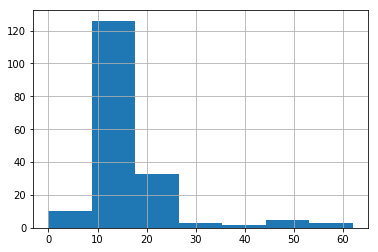

In [12]:
maternity['Weeks'].hist(bins=7)

In [13]:
maternity.describe()

,Weeks
count,182.000000
mean,16.384615
std,9.758712
min,0.000000
25%,12.000000
50%,14.000000
75%,17.750000
max,62.000000
